In [ ]:
# http://polar.ncep.noaa.gov/waves/examples/usingpython.shtml

# Example 1: Plot data from the NOMADS Data Server

In [1]:
% load_ext autoreload
% autoreload 2

import numpy as np
import pandas as pd

In [2]:
import mpl_toolkits

In [3]:
import os

In [4]:
os.environ["PROJ_LIB"] = "/home/yipstar/anaconda3/envs/drl/share/proj"

In [5]:
from mpl_toolkits.basemap import Basemap

In [6]:
import matplotlib.pyplot as plt
import netCDF4

In [7]:
# set up the figure
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [8]:
# set up the URL to access the data server.
# See the NWW3 directory on NOMADS 
# for the list of available model run dates.
mydate = '20181118'
url = 'http://nomads.ncep.noaa.gov:9090/dods/wave/nww3/nww3'+ mydate + '/nww3' + mydate + '_00z'

#https://nomads.ncep.noaa.gov/pub/data/nccf/com/wave/prod/multi_1.20190624/

In [9]:
# Extract the significant wave height of combined wind waves and swell

file = netCDF4.Dataset(url)
lat  = file.variables['lat'][:]
lon  = file.variables['lon'][:]
data = file.variables['htsgwsfc'][1,:,:]

In [10]:
file.variables

OrderedDict([('time', <class 'netCDF4._netCDF4.Variable'>
              >f8 time(time)
                  grads_dim: t
                  grads_mapping: linear
                  grads_size: 61
                  grads_min: 00z18nov2018
                  grads_step: 3hr
                  units: days since 1-1-1 00:00:0.0
                  long_name: time
                  minimum: 00z18nov2018
                  maximum: 12z25nov2018
                  resolution: 0.125
              unlimited dimensions: 
              current shape = (61,)
              filling off), ('lat', <class 'netCDF4._netCDF4.Variable'>
              >f8 lat(lat)
                  grads_dim: y
                  grads_mapping: linear
                  grads_size: 157
                  units: degrees_north
                  long_name: latitude
                  minimum: -78.0
                  maximum: 78.0
                  resolution: 1.0
              unlimited dimensions: 
              current shape = (157,)
    

In [ ]:
# Since Python is object oriented, you can explore the contents of the NOMADS
# data set by examining the file object, such as file.variables.

# The indexing into the data set used by netCDF4 is standard python indexing.
# In this case we want the first forecast step, but note that the first time 
# step in the RTOFS OpenDAP link is all NaN values.  So we start with the 
# second timestep

file.close()

In [11]:
# Plot the field using Basemap.  Start with setting the map
# projection using the limits of the lat/lon data itself:

m = Basemap(projection='mill', lat_ts=10, llcrnrlon=lon.min(), \
  urcrnrlon=lon.max(), llcrnrlat=lat.min(), urcrnrlat=lat.max(), \
  resolution='c')

In [12]:
# convert the lat/lon values to x/y projections.

x, y = m(*np.meshgrid(lon,lat))

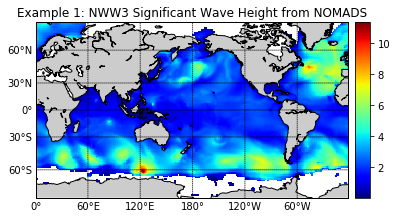

In [13]:
# plot the field using the fast pcolormesh routine 
# set the colormap to jet.

m.pcolormesh(x, y, data, shading='flat', cmap=plt.cm.jet)
m.colorbar(location='right')

# Add a coastline and axis values.

m.drawcoastlines()
m.fillcontinents()
m.drawmapboundary()
m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,1])


# Add a colorbar and title, and then show the plot.

plt.title('Example 1: NWW3 Significant Wave Height from NOMADS')
plt.show()

In [ ]:
# Example 2: Plot data from an NWW3 GRiB2 file

In [15]:
import pygrib

In [16]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [17]:
grib = 'multi_1.at_10m.t00z.f000.grib2';
grbs = pygrib.open(grib)

In [18]:
# In this example we will extract the same significant wave height field
# we used in the first example.

grb = grbs.select(name='Significant height of wind waves')[0]
data = grb.values
lat, lon = grb.latlons()


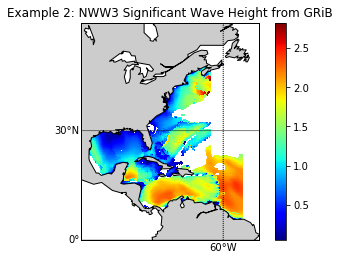

In [21]:
# From this point on the code is almost identical to the previous example.
# Plot the field using Basemap. Start with setting the map projection using the
# limits of the lat/lon data itself:

m = Basemap(projection='mill', lat_ts=10, llcrnrlon=lon.min(), \
  urcrnrlon=lon.max(), llcrnrlat=lat.min(), urcrnrlat=lat.max(), \
  resolution='c')

# Convert the lat/lon values to x/y projections.
x, y = m(lon,lat)

# Next, plot the field using the fast pcolormesh routine and set the colormap to jet.
cs = m.pcolormesh(x,y,data,shading='flat',cmap=plt.cm.jet)

# Add a coastline and axis values.
m.drawcoastlines()
m.fillcontinents()
m.drawmapboundary()
m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,1])

# Add a colorbar and title, and then show the plot.
plt.colorbar(cs,orientation='vertical')
plt.title('Example 2: NWW3 Significant Wave Height from GRiB')
plt.show()
